Gradient descent for linear regression

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def mean_square_error(y_true, y_predict):
  loss = np.sum((y_true - y_predict)**2) / len(y_true)
  return loss

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):
  current_weight = 0.1
  current_bias = 0.01
  iterations = iterations
  learning_rate = learning_rate
  stopping_threshold = stopping_threshold
  n = float(len(x))

  loss = []
  weights = []
  previous_loss = None

  for i in range(iterations):
    y_predicted = (current_weight * x) + current_bias
    current_loss = mean_square_error(y, y_predicted)

    if previous_loss and abs(previous_loss - current_loss) <= stopping_threshold:
      break

    previous_loss = current_loss
    loss.append(current_loss)
    weights.append(current_weight)

    weight_deriv = - (2/n) * sum(x * (y - y_predicted))
    bias_deriv = - (2/n) * sum(y-y_predicted)

    current_weight = current_weight - (learning_rate * weight_deriv)
    current_bias = current_bias - (learning_rate * bias_deriv)

    print(f"Iteration {1+1}: Loss {current_loss}, Weight \ {current_weight}, Bias {current_bias}")

  plt.figure(figsize = (8,6))
  plt.plot(weights, loss)
  plt.scatter(weights, loss, marker='o', color='red')
  plt.title("Loss vs Weights")
  plt.ylabel("Loss")
  plt.xlabel("Weights")
  plt.show()

  return current_weight, current_bias 

In [27]:
!wget -q 'https://bortigno.web.cern.ch/bortigno/machine-learninig/datasets/dash-world-cleaned.txt'
runs = pd.read_csv('dash-world-cleaned.txt', skiprows=[1], delimiter='\t')

#x_for_train = list(zip(runs['time'],runs['year']))
#x_train, x_test, y_train, y_test = train_test_split(np.array(x_for_train),np.array(runs['type']),random_state=42,test_size=0.33)
x_train, x_test, y_train, y_test = train_test_split(np.array(runs['time']),np.array(runs['type']),random_state=42,test_size=0.33)


Iteration 2: Loss 0.2649916764705882, Weight \ 0.10066400194117647, Bias 0.010058970588235294
Iteration 2: Loss 0.2605973650870514, Weight \ 0.10131323409872431, Bias 0.010116537517107423
Iteration 2: Loss 0.2563964746558153, Weight \ 0.10194802519830812, Bias 0.010172732027421175
Iteration 2: Loss 0.2523804911906992, Weight \ 0.10256869664926563, Bias 0.010227584664666178
Iteration 2: Loss 0.2485412754734046, Weight \ 0.10317556270744452, Bias 0.01028112529449227
Iteration 2: Loss 0.244871046557017, Weight \ 0.10376893063441502, Bias 0.010333383117840442
Iteration 2: Loss 0.2413623659956477, Weight \ 0.10434910085313896, Bias 0.010384386685737029
Iteration 2: Loss 0.23800812276825442, Weight \ 0.10491636710017425, Bias 0.01043416391375861
Iteration 2: Loss 0.23480151886608358, Weight \ 0.10547101657449166, Bias 0.010482742096174993
Iteration 2: Loss 0.23173605551452342, Weight \ 0.10601333008297951, Bias 0.010530147919777404
Iteration 2: Loss 0.2288055200014424, Weight \ 0.10654358218

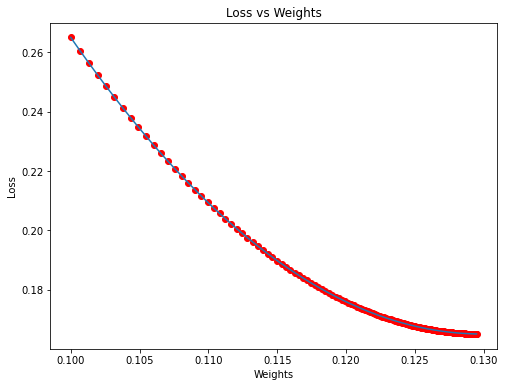

Estimated Weight: 0.1294951980552292
Estimated Bias: 0.012009523586221187


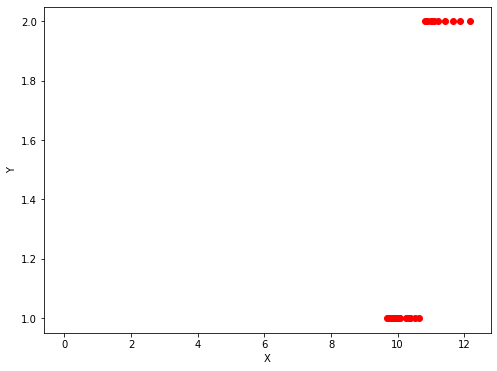

In [28]:
def main():
  X = np.array(x_train)
  Y = np.array(y_train)

  estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000, learning_rate = 0.0001, stopping_threshold = 1e-6)
  print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

  Y_pred = estimated_weight * X + estimated_bias

  plt.figure(figsize = (8,6))
  plt.scatter(X, Y, marker='o', color='red')
  plt.plot([min(X)], [min(Y_pred)], [max(Y_pred)], color='blue', markerfacecolor='red', markersize=10, linestyle='dashed')
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

if __name__== "__main__":
  main()